In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# ab ham ye sample data set diabetes ka load krenge
df = load_diabetes()

In [4]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
# problem statement = to predict the disease progression after one year of base line 
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
print(df.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [7]:
print(df.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
data = pd.DataFrame(df.data,columns = df.feature_names)

In [9]:
data['target'] = df.target

In [10]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
# life cycle = EDA -> DATA PREP -> FEATURE SELECTION

In [13]:
# trying ot predict the target based on the bmi 
x = data[['bmi']] 
y = data['target']

In [14]:
x

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [15]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 2 )
#random state helps us to reproduse same result again and agian with fixing the split 

In [61]:
print("x_train :" ,x_train , "x_test : " , x_test)

x_train :           bmi
70  -0.069797
37   0.011039
170 -0.020218
400  0.045529
286 -0.054707
..        ...
299 -0.013751
22  -0.004050
72  -0.004050
15  -0.018062
168  0.059541

[353 rows x 1 columns] x_test :            bmi
212  0.003494
422  0.077863
67  -0.014828
89  -0.048241
390  0.069241
..        ...
129  0.016428
417  0.071397
332  0.104809
150  0.070319
192 -0.030996

[89 rows x 1 columns]


In [63]:
print("y_train :" ,y_train , "y_test : " , y_test)

y_train : 70      48.0
37     276.0
170     47.0
400    175.0
286     60.0
       ...  
299     83.0
22      68.0
72     202.0
15     171.0
168    268.0
Name: target, Length: 353, dtype: float64 y_test :  212     73.0
422    233.0
67      97.0
89     111.0
390    277.0
       ...  
129    268.0
417     55.0
332    270.0
150    288.0
192     91.0
Name: target, Length: 89, dtype: float64


In [20]:
# model training 
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [45]:
model.coef_ # atttribute h ye model ka ek 

array([974.48209999])

In [49]:
model.intercept_ # ye intercept h hamre linear model ka 

152.45404935855575

In [51]:
y_pred = model.predict(x_test)

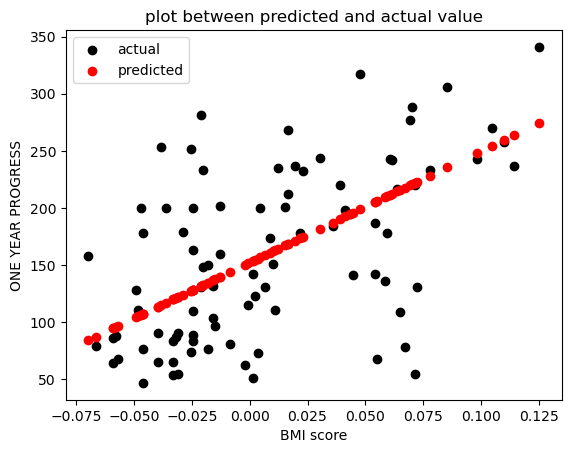

In [80]:
plt.scatter(x_test,y_test , color = "black" , label = "actual")
plt.scatter(x_test,y_pred , color = "red" , label = "predicted")
plt.xlabel("BMI score")
plt.ylabel("ONE YEAR PROGRESS")
plt.title("plot between predicted and actual value")           
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error 
print(f"MSE of our model is {mean_squared_error(y_test,x_test):.2f}")

MSE of our model is 30728.30
